
<div align="center">
    <img src="image/foto_portada.jpg" alt="Tres personas catando vinos." style="width: 600px; height: 300px; border-radius: 10px;">
    <h1 style="font-family: Arial, sans-serif; font-size: 32px; font-weight: bold; margin-top: 20px; text-align: center;">Explorando la calidad del vino</h1>
    <h2 style="font-family: Arial, sans-serif; font-size: 20px; font-weight: normal; text-align: center;">Una aproximación a través de técnicas de procesamiento de datos</h2>
</div>


<br>El objetivo de este trabajo es establecer, por medio de técnicas de procesamiento de datos, las variables más influyentes en la calidad sensorial del vino.<br> 
Se analiza una variable dependiente (calidad) y diez variables independientes: acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, y alcohol.<br>
Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino rojo del vino portugués "Vinho Verde".
La fuente de los mismos son del Machine Learning Repository de UCI. Puedes conocer más de ellos [aquí](https://archive.ics.uci.edu/dataset/186/wine+quality).

 # 1.  Recolección y preparación de datos
### Limpieza, integración y transformación necesarias para preparar los datos para el análisis

### • Carga de datos

In [1]:
import pandas as pd


In [2]:
#importacion
tablas = ['winequality-red.csv',
          'winequality-white.csv']

archivos = []

ruta_data = 'data'  # Ruta relativa a la carpeta "data"

for t in tablas:
    ruta_archivo = f'{ruta_data}/{t}'
    datos = pd.read_csv(ruta_archivo,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

vino_tinto,vino_blanco = archivos[:2]


### • Exploración inicial para preparar los datos

In [3]:
#cuantas filas y columnas tienen?
vino_tinto.shape,vino_blanco.shape

((1599, 12), (4898, 12))

In [4]:
#primeros diez registros data set tinto
vino_tinto.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
#primeros diez registros data set blanco
vino_blanco.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [6]:
#resumen del dataset: variables,tipo,estadisticos descriptivos,etc
vino_tinto.info()
vino_tinto.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
vino_blanco.info()
vino_blanco.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### • Integración y transformación de los datos

In [8]:
# Inclusion variable categoria a cada DataFrame que indica si el vino es rojo (red) o blanco (white). 
vino_tinto['categoria'] = 'rojo'
vino_blanco['categoria'] = 'blanco'


In [9]:
df_vinos = vino_tinto.merge(vino_blanco, how='outer') #full join

# Validación
filas_esperadas = vino_tinto.shape[0] + vino_blanco.shape[0]
columnas_esperadas = vino_tinto.shape[1]
filas_df_vinos = df_vinos.shape[0]
columnas_df_vinos = df_vinos.shape[1]

 
if filas_df_vinos == filas_esperadas and columnas_df_vinos == columnas_esperadas:
    print("La unión fue exitosa")
else:
    print("La unión no se realizó correctamente")

La unión fue exitosa


In [10]:
df_vinos


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rojo
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rojo
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,rojo
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,rojo
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanco


In [11]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  categoria             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [12]:
nuevos_nombres_col ={"fixed acidity":"acidez_fija",
                    "volatile acidity":"acidez_volatil",
                    "citric acid":"acido_citrico",
                     "residual sugar":"azucar_residual",
                     "chlorides":"cloruros",
                     "free sulfur dioxide":"dioxido_azufre_libre",
                     "total sulfur dioxide":"dioxido_azufre_total",
                     "density":"densidad",
                     "sulphates":"sulfatos",
                     "quality":"calidad"
                    }
df_vinos= df_vinos.rename(columns=nuevos_nombres_col)

In [13]:
#dataset listo para usar
df_vinos


,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,categoria
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rojo
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rojo
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,rojo
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,rojo
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanco
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanco
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanco
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanco


## 2. Análisis exploratorio de datos

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df_vinos.dtypes

acidez_fija             float64
acidez_volatil          float64
acido_citrico           float64
azucar_residual         float64
cloruros                float64
dioxido_azufre_libre    float64
dioxido_azufre_total    float64
densidad                float64
pH                      float64
sulfatos                float64
alcohol                 float64
calidad                   int64
categoria                object
dtype: object

In [16]:
df_vinos.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


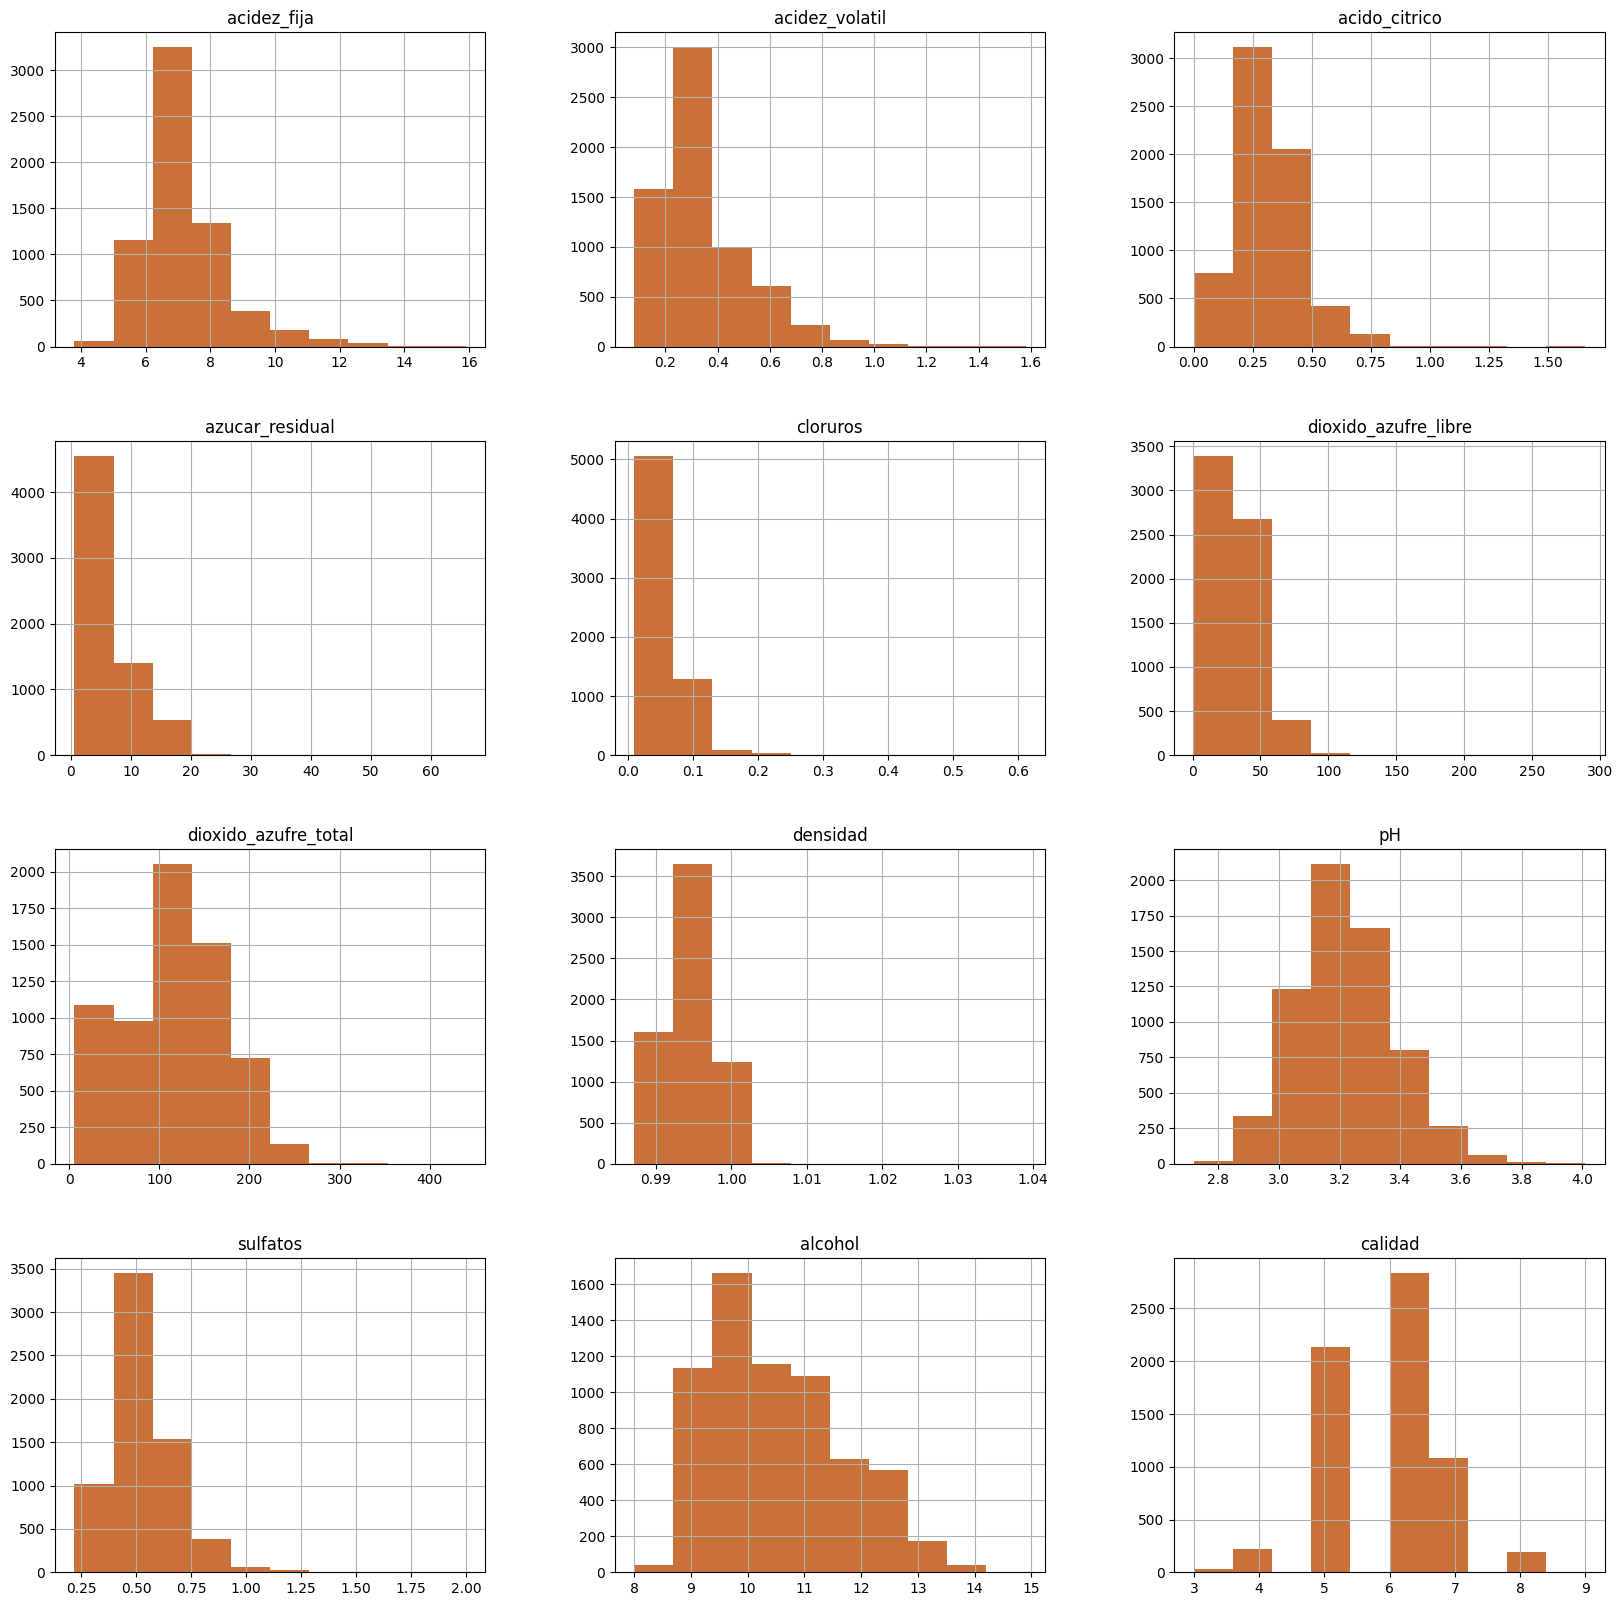

In [17]:
#Histogramas con respecto a cada una de las variables
df_vinos.hist(figsize=(20,20), color='#C97138')
plt.show()

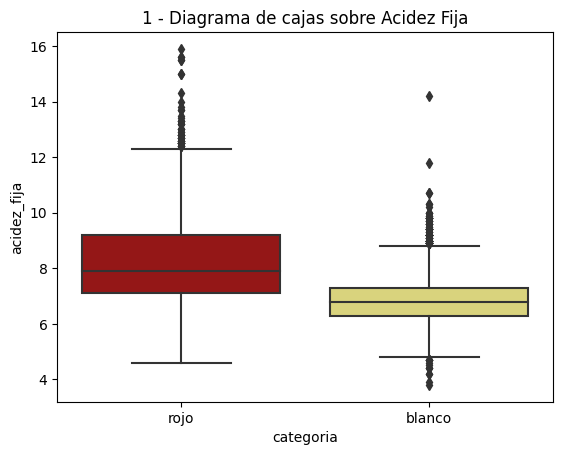

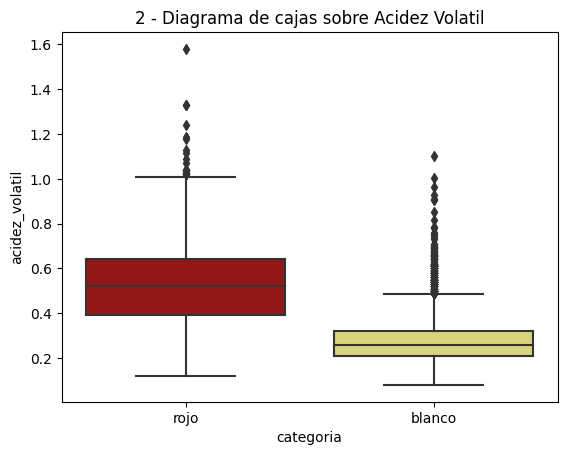

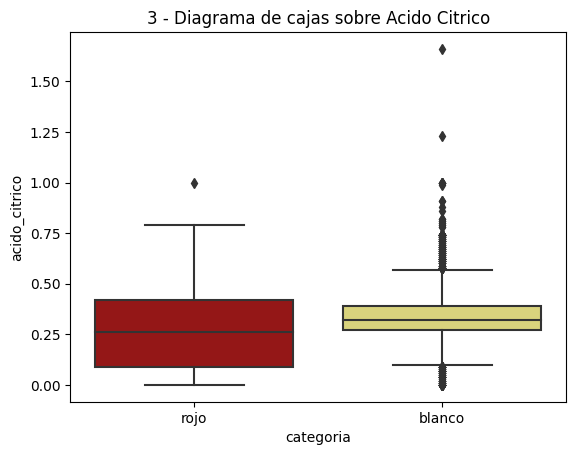

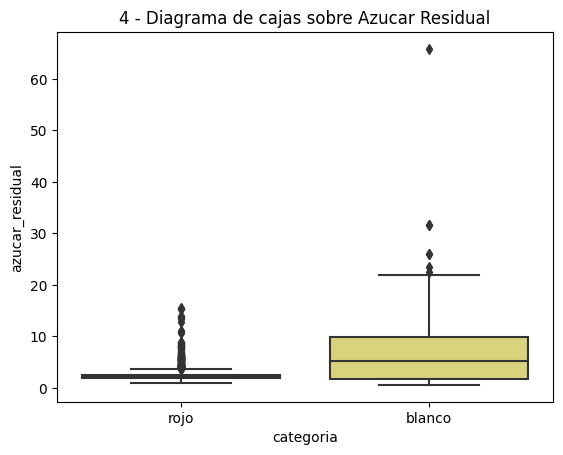

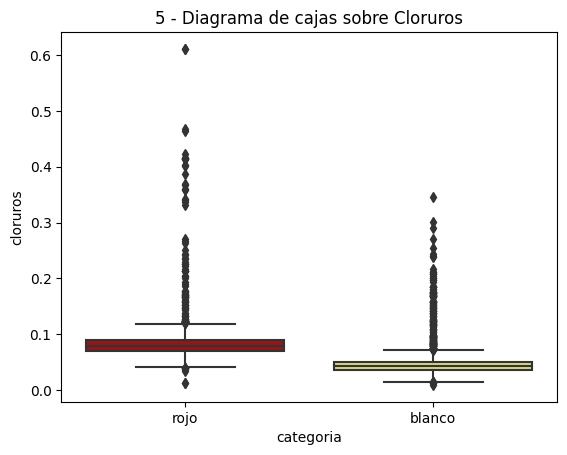

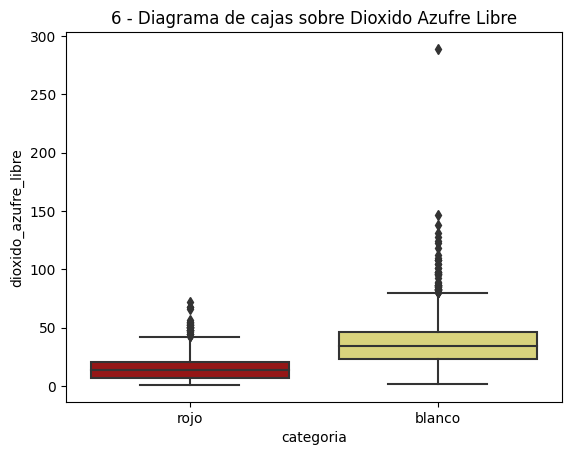

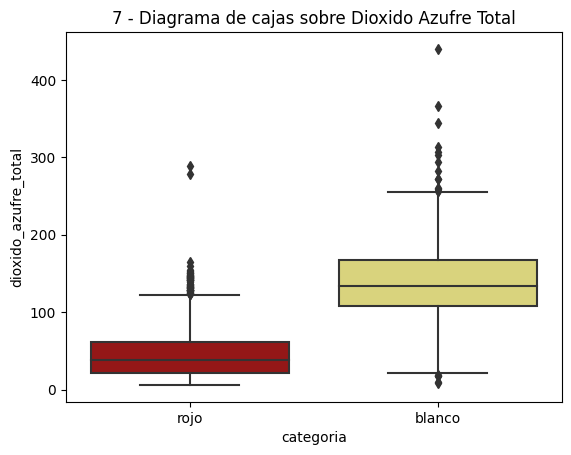

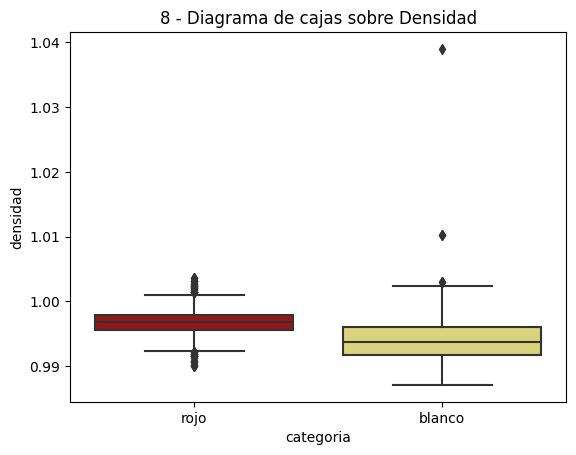

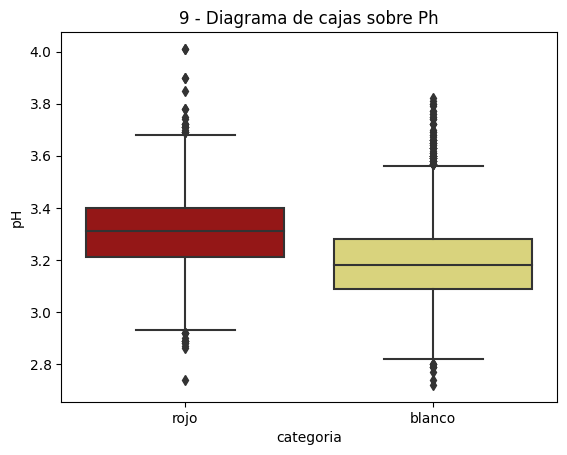

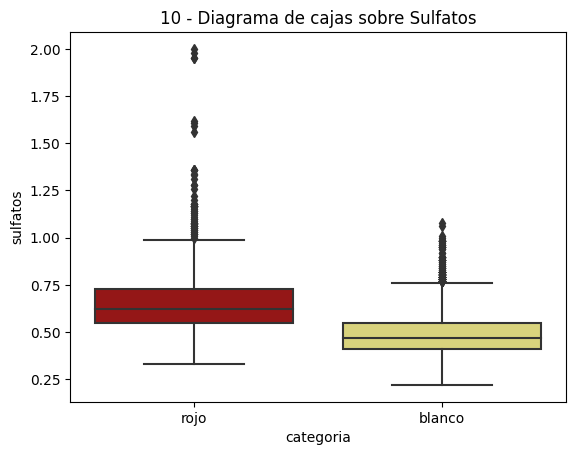

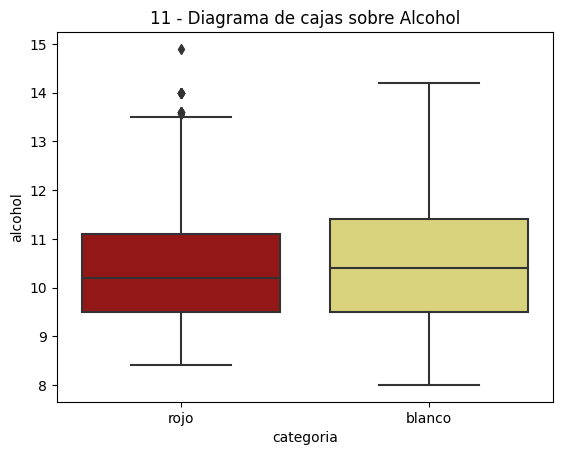

In [18]:
#Mostramos las distintas variables en relación a las categorias de vinos
columnas = list(df_vinos.columns.values)
for i in range(len(columnas)-2):
    titulo = (columnas[i].split('_'))
    grafico = sns.boxplot(df_vinos, x=columnas[12], y=columnas[i],palette=['#a90202', '#e8e06e'])
    if len(titulo) == 2:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()}')
    elif len(titulo) == 3:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()} {titulo[2].capitalize()}')
    else:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()}')
    plt.show()


In [19]:
#Revisamos la variable calidad para analizarla
calidad = df_vinos['calidad']
calidad

0       5
1       5
2       5
3       5
4       6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: calidad, Length: 6497, dtype: int64

In [20]:
# Corroboramos las cantidades de registros segun la variable "calidad"
cantidad_por_calidad = df_vinos['calidad'].value_counts()
cantidad_por_calidad

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: calidad, dtype: int64

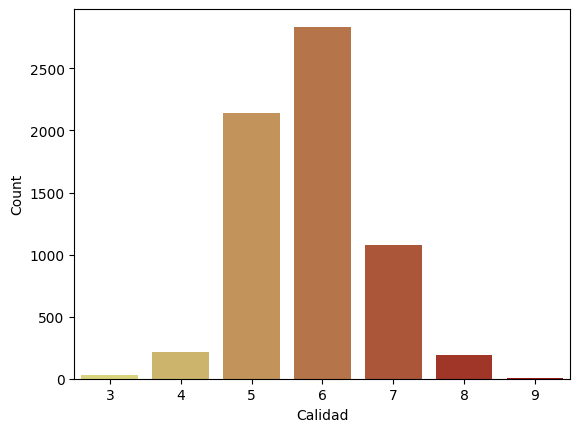

In [21]:
#Grafiicamos la anterior exploración
sns.countplot(data=df_vinos, x='calidad', palette="blend:#e8e06e,#a90202")
plt.xlabel('Calidad')
plt.ylabel('Count')
plt.show()

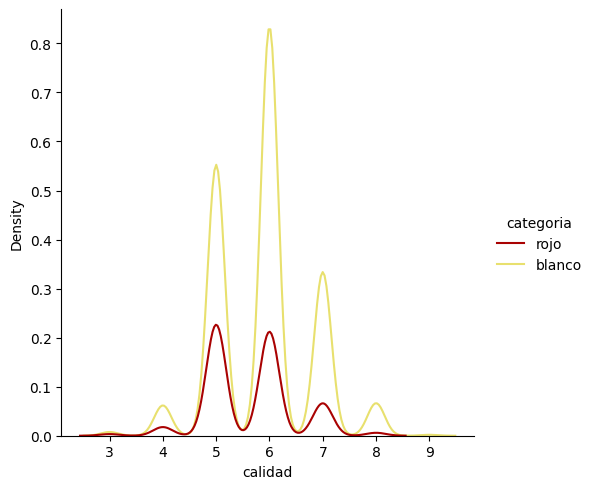

In [22]:
#Dividimos el analisis según la categoria
sns.displot(df_vinos, x="calidad", hue="categoria", kind="kde",palette=['#a90202', '#e8e06e'])
plt.show()

In [23]:
# matriz de correlacions
vinos_corr = df_vinos.filter(['acidez_fija',	'acidez_volatil',	'acido_citrico',	'azucar_residual',	'cloruros',	'dioxido_azufre_libre',	'dioxido_azufre_total',	'densidad','pH',	'sulfatos',	'alcohol',	'calidad']).corr()
vinos_corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
acidez_volatil,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
acido_citrico,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
azucar_residual,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
cloruros,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
dioxido_azufre_libre,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
dioxido_azufre_total,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
densidad,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulfatos,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


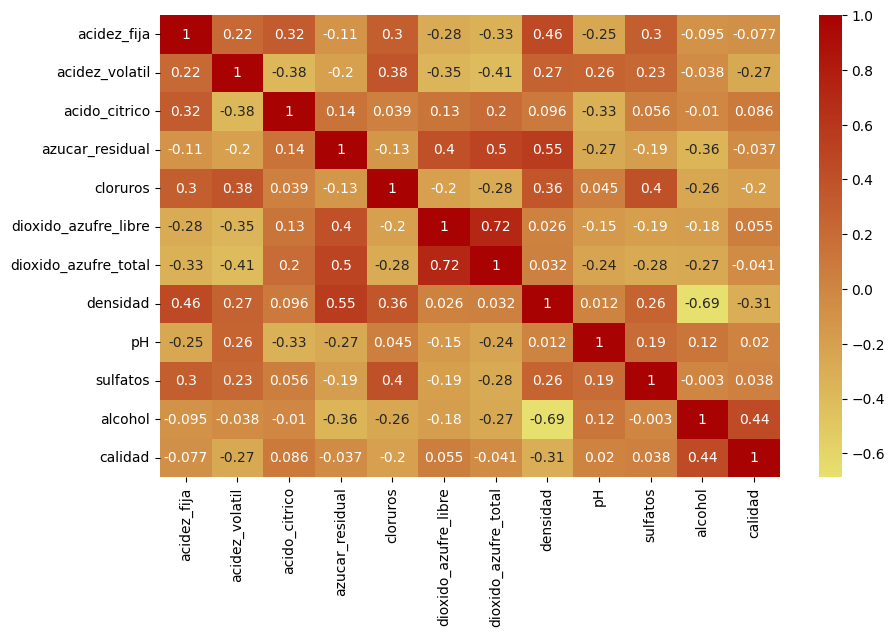

In [24]:
#Gráfico de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(vinos_corr, cmap=sns.color_palette("blend:#e8e06e,#a90202", as_cmap=True), annot=True)
plt.show()

# 3. Procesamiento y análisis de datos

Teniendo en cuenta la calidad, podemos definir las categorías de los vinos en 5 segmentos:
- Bajo
- Medio Bajo
- Medio
- Medio Alto
- Alto

Luego aplicamos la categorización y agregamos una nueva columna al dataframe.

In [25]:
df_vinos['categoria_calidad'] = df_vinos['calidad'].apply(lambda x: 'Bajo' if x <= 4 else 'Medio Bajo' if x == 5  else 'Medio' if x==6 else 'Medio Alto' if x== 7 else 'Alto')
df_vinos.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,categoria,categoria_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,rojo,Medio Bajo
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,rojo,Medio Bajo
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,rojo,Medio


In [26]:
df_vinos.describe(include='object')

,categoria,categoria_calidad
count,6497,6497
unique,2,5
top,blanco,Medio
freq,4898,2836


### • Tratamiento de outliers

In [27]:
#METODO IQR

columns_of_interest = df_vinos.columns.drop(['categoria', 'categoria_calidad'])
print(columns_of_interest)
print('')

# Calcular los límites del rango intercuartílico (IQR) para cada columna
Q1 = df_vinos[columns_of_interest].quantile(0.25)
Q3 = df_vinos[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers usando el criterio del IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Obtener los outliers en cada columna
outliers = ((df_vinos[columns_of_interest] < lower_bound) | (df_vinos[columns_of_interest] > upper_bound)).any(axis=1)

# Imprimir los registros con outliers
print(df_vinos[outliers])

Index(['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
0             7.4            0.70           0.00              1.9     0.076   
1             7.4            0.70           0.00              1.9     0.076   
2             7.8            0.88           0.00              2.6     0.098   
3             7.8            0.76           0.04              2.3     0.092   
4            11.2            0.28           0.56              1.9     0.075   
...           ...             ...            ...              ...       ...   
6444          6.6            0.38           0.29              2.4     0.136   
6446          4.4            0.54           0.09              5.1     0.038   
6476          5.9            0.54           0.00              0

In [28]:
# Filtrar los registros sin outliers
df_vinos_filtered = df_vinos[~outliers]

# Imprimir el DataFrame filtrado
print(df_vinos_filtered)

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
6             7.9            0.60           0.06              1.6     0.069   
9             7.5            0.50           0.36              6.1     0.071   
10            7.5            0.50           0.36              6.1     0.071   
11            6.7            0.58           0.08              1.8     0.097   
16            8.5            0.28           0.56              1.8     0.092   
...           ...             ...            ...              ...       ...   
6492          6.2            0.21           0.29              1.6     0.039   
6493          6.6            0.32           0.36              8.0     0.047   
6494          6.5            0.24           0.19              1.2     0.041   
6495          5.5            0.29           0.30              1.1     0.022   
6496          6.0            0.21           0.38              0.8     0.020   

      dioxido_azufre_libre  dioxido_azufre_total  d

### • Comparación de cantidad de registros con y sin filtrar outliers

In [29]:
df_vinos.describe(include='object')


,categoria,categoria_calidad
count,6497,6497
unique,2,5
top,blanco,Medio
freq,4898,2836


In [30]:
df_vinos_filtered.describe(include='object')

,categoria,categoria_calidad
count,4840,4840
unique,2,4
top,blanco,Medio
freq,4158,2262


In [31]:
#Corroboramos que categorias de calidades quedaron
for i in range(len(df_vinos_filtered['categoria_calidad'].unique())):
    print(df_vinos_filtered['categoria_calidad'].unique()[i])

Medio Bajo
Medio Alto
Bajo
Medio


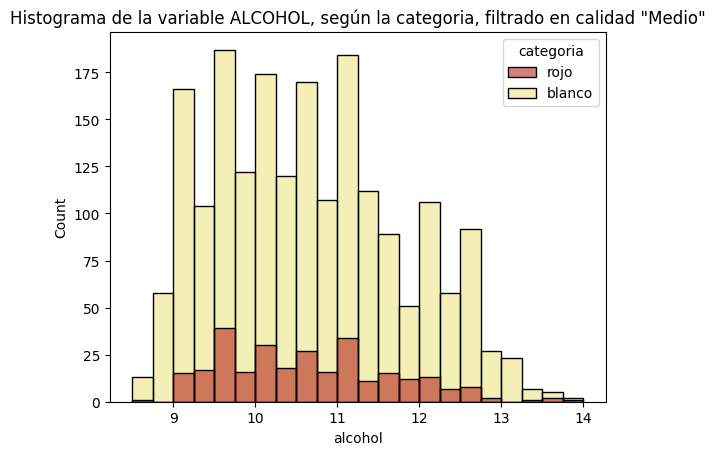

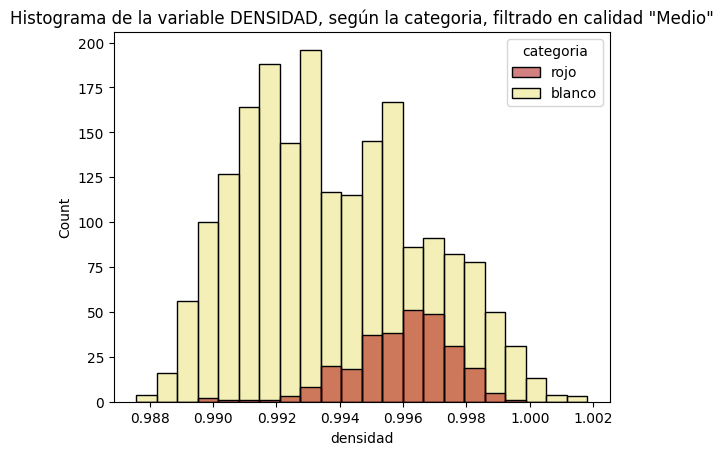

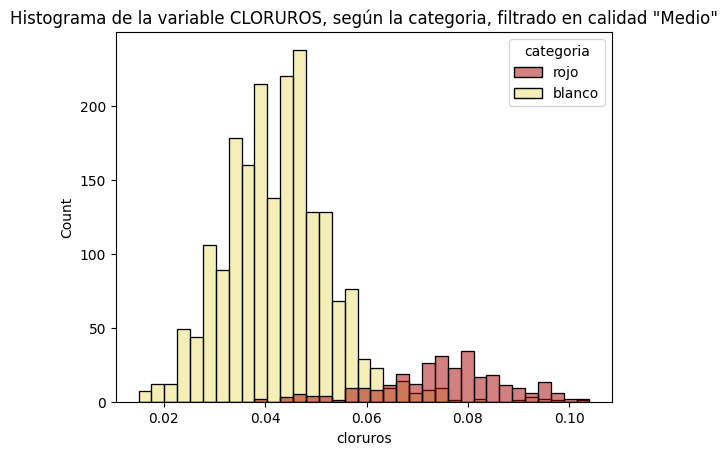

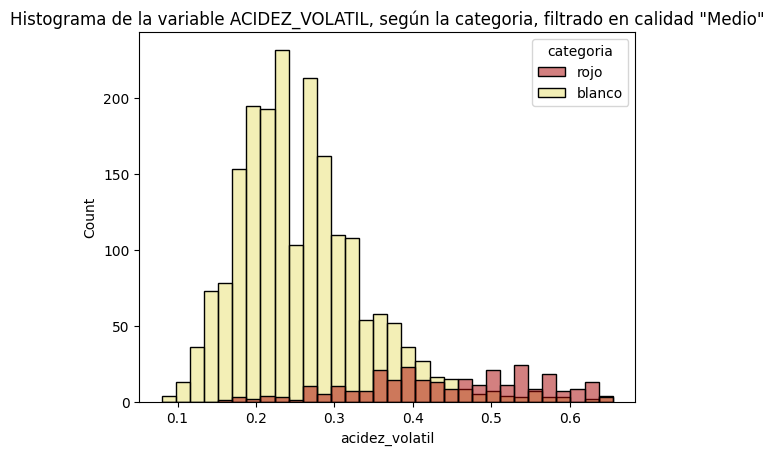

In [32]:
# Histograma alcohol, densidad, cloruros, acidez volatil sobre la categoria de calidad TOP: "Medio"
variables_analizadas = ['alcohol','densidad','cloruros','acidez_volatil']
for i in range(len(variables_analizadas)):
    grafico = sns.histplot(df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio'], x=variables_analizadas[i], hue='categoria',palette=['#a90202', '#e8e06e'])
    grafico.set_title(f'Histograma de la variable {variables_analizadas[i].upper()}, según la categoria, filtrado en calidad "Medio"')
    plt.show()


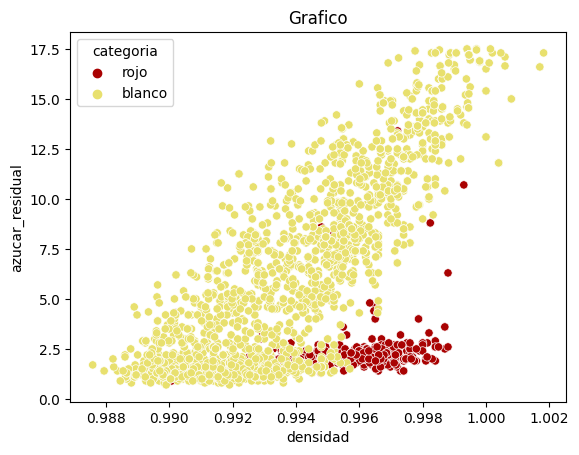

In [33]:
grafico = sns.scatterplot(df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio'], x='densidad', y='azucar_residual', hue='categoria',palette=['#a90202', '#e8e06e'])
grafico.set_title('Grafico')
plt.show()

### • Comparaciones de las medias entre categoria de vinos

In [34]:
# Add Start Section Diego Ormeño & Romina Ulerich


In [35]:
# Calculamos de cada df el promedio de cada campo
def_tinto = df_vinos_filtered[df_vinos_filtered['categoria'] == 'rojo'].mean( numeric_only=True  )
def_blanco = df_vinos_filtered[df_vinos_filtered['categoria'] == 'blanco'].mean( numeric_only=True  )


In [36]:
# imprimimos en pantalla los datos 
def_tinto

acidez_fija              7.718915
acidez_volatil           0.462141
acido_citrico            0.270674
azucar_residual          2.443255
cloruros                 0.076158
dioxido_azufre_libre    17.123900
dioxido_azufre_total    51.370968
densidad                 0.996232
pH                       3.335425
sulfatos                 0.623123
alcohol                 10.402786
calidad                  5.656891
dtype: float64

In [37]:
# imprimimos en pantalla los datos 
def_blanco

acidez_fija               6.851696
acidez_volatil            0.272113
acido_citrico             0.323184
azucar_residual           6.069180
cloruros                  0.043088
dioxido_azufre_libre     34.253968
dioxido_azufre_total    136.889370
densidad                  0.993849
pH                        3.189577
sulfatos                  0.486558
alcohol                  10.552524
calidad                   5.848244
dtype: float64

In [38]:
# Generamos un nuevo df llamado 'resultado' donde tendremos 2 columnas representado cada tipo de vino
resultado = pd.concat([def_blanco, def_tinto], axis=1)

In [39]:
# Renombramos los title de cada columna
resultado = resultado.rename(columns={0: 'Blanco', 1: 'Tinto'})

In [40]:
# Imprimo en pantalla el df resultante
resultado

,Blanco,Tinto
acidez_fija,6.851696,7.718915
acidez_volatil,0.272113,0.462141
acido_citrico,0.323184,0.270674
azucar_residual,6.069180,2.443255
cloruros,0.043088,0.076158
dioxido_azufre_libre,34.253968,17.123900
dioxido_azufre_total,136.889370,51.370968
densidad,0.993849,0.996232
pH,3.189577,3.335425
sulfatos,0.486558,0.623123


# 4. Visualización de datos

### • Correlaciones de variables con outliers

 <img src="image/grafico_dispersion_outliers.png" alt="Mapa de disperción" style=" border-radius: 10px;">

### • Correlaciones de variables sin outliers

 <img src="image/grafico_dispersion_sin_outliers.png" alt="Mapa de disperción" style=" border-radius: 10px;">

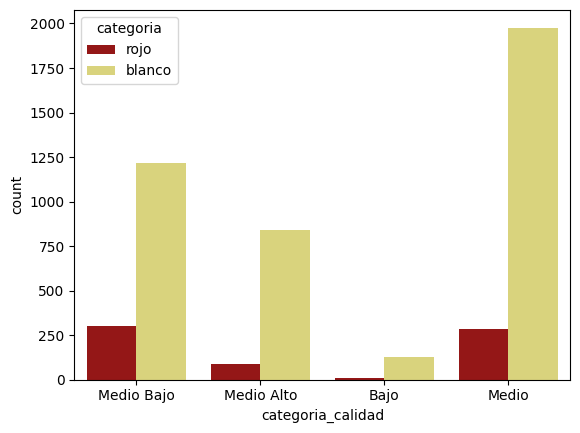

In [41]:
# Comparación por calidad entre vino rojo y blanco
sns.countplot(df_vinos_filtered, x='categoria_calidad', hue='categoria',palette=['#a90202', '#e8e06e'])
plt.show()

In [42]:
# Correlación de la calidad del vino con respecto a las otras variables.
correlation_quality = df_vinos_filtered[columns_of_interest].corr()['calidad'].sort_values(ascending=False)
print(correlation_quality)

calidad                 1.000000
alcohol                 0.428784
acido_citrico           0.079471
dioxido_azufre_libre    0.055663
sulfatos                0.054356
pH                      0.039561
azucar_residual        -0.045903
dioxido_azufre_total   -0.090688
acidez_fija            -0.091185
acidez_volatil         -0.226764
cloruros               -0.256976
densidad               -0.304314
Name: calidad, dtype: float64


# 5. Comunicación efectiva de resultados